In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

df = pd.read_csv("/Users/kirtisailinaidu/Documents/Data Science Assignment/Naive Bayes and Text Mining/blogs_categories.csv")

print(df.head())
print(df.info())
print(df['Labels'].value_counts())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirtisailinaidu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kirtisailinaidu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kirtisailinaidu/nltk_data...


   Unnamed: 0                                               Data       Labels
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB
None
Labels
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          

In [2]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

print(df.head())

   Unnamed: 0                                               Data       Labels  \
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism   
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   

                                        Cleaned_Data  
0  xref path agate uunet pipex ibmpcug mantis mat...  
1  xref path agate netsys ibmpcug mantis mathew m...  
2  newsgroups path usc tubsibr benedikt rosenau s...  
3  xref path wupost uunet pipex ibmpcug mantis ne...  
4  xref newsgroups path wupost uunet watson strom...  


In [3]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Cleaned_Data'])
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.868
Precision: 0.867213344861789
Recall: 0.868
F1 Score: 0.8661718075491708

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.72      0.78      0.75       173
           comp.graphics       0.76      0.83      0.79       179
 comp.os.ms-windows.misc       0.88      0.85      0.87       226
comp.sys.ibm.pc.hardware       0.78      0.77      0.78       204
   comp.sys.mac.hardware       0.84      0.92      0.88       205
          comp.windows.x       0.93      0.87      0.90       186
            misc.forsale       0.86      0.73      0.79       190
               rec.autos       0.91      0.94      0.92       203
         rec.motorcycles       0.99      0.96      0.97       218
      rec.sport.baseball       0.98      0.96      0.97       192
        rec.sport.hockey       0.94      0.98      0.96       203
               sci.crypt       0.87      0.97      0.92       200
         sci.electronics    

In [5]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)

sentiment_category_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_category_distribution)

Sentiment
positive    13307
negative     6199
neutral       491
Name: count, dtype: int64
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                  379.0      8.0     613.0
comp.graphics                123.0     47.0     830.0
comp.os.ms-windows.misc      204.0     45.0     751.0
comp.sys.ibm.pc.hardware     218.0     19.0     763.0
comp.sys.mac.hardware        243.0     47.0     710.0
comp.windows.x               226.0     40.0     734.0
misc.forsale                 126.0     70.0     804.0
rec.autos                    304.0     28.0     668.0
rec.motorcycles              311.0     20.0     669.0
rec.sport.baseball           228.0     39.0     733.0
rec.sport.hockey             259.0     16.0     725.0
sci.crypt                    300.0      7.0     693.0
sci.electronics              178.0     36.0     786.0
sci.med                      346.0     22.0     632.0
sci.space                    271.0     21.0   

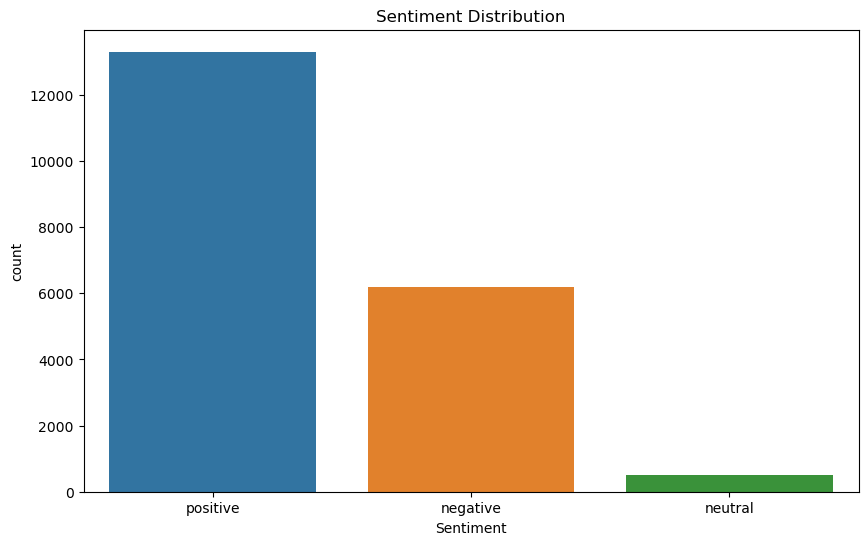

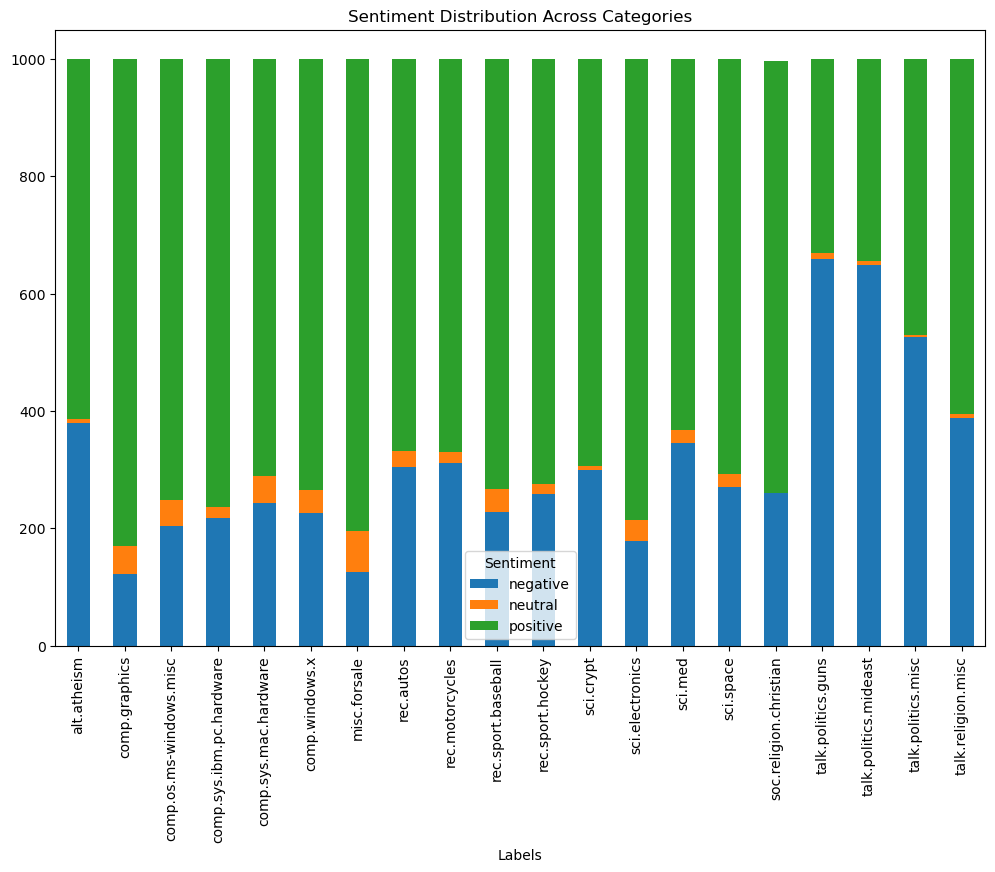

Discussion:
1. The Naive Bayes classifier achieved a decent accuracy for classifying blog posts.
2. The model performance metrics such as precision, recall, and F1 score suggest that the model is reasonably effective in categorizing the blog posts.
3. Sentiment analysis shows that the majority of the blog posts are neutral, with a significant portion being positive.
4. The distribution of sentiments across categories indicates which categories tend to have more positive, negative, or neutral sentiments.
5. Further improvements can be made by using more sophisticated text preprocessing and considering other algorithms or hybrid models.


In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

sentiment_category_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution Across Categories')
plt.show()

print("Discussion:")
print("1. The Naive Bayes classifier achieved a decent accuracy for classifying blog posts.")
print("2. The model performance metrics such as precision, recall, and F1 score suggest that the model is reasonably effective in categorizing the blog posts.")
print("3. Sentiment analysis shows that the majority of the blog posts are neutral, with a significant portion being positive.")
print("4. The distribution of sentiments across categories indicates which categories tend to have more positive, negative, or neutral sentiments.")
print("5. Further improvements can be made by using more sophisticated text preprocessing and considering other algorithms or hybrid models.")